In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('Datasets/Major_Project.csv')

### Understanding Dataset

In [3]:
df.head()

,Country_Name,Country_Code,Year,GDP_(constant_2015_US$),"Birth_rate_crude_(per_1,000_people)",Births_attended_by_skilled_health_staff_(%_of_total),"Death_rate_crude_(per_1,000_people)",Fertility_rate_total_(births_per_woman),GNI_per_capita_Atlas_method_(current_US$),"Hospital_beds_(per_1,000_people)",...,School_enrollment_tertiary_(%_gross),School_enrollment_tertiary_female_(%_gross),Unemployment_female_(%_of_female_labor_force),Unemployment_male_(%_of_male_labor_force),Unemployment_total_(%_of_total_labor_force),Urban_population,Urban_population_(%_of_total_population),Urban_population_growth_(annual_%),Net_trade_in_goods_and_services(current_$USD),electricity_demand(in_TWh)
0,Afghanistan,AFG,2002,7.555185e+09,48.201,89.469499,11.280,7.339,19203.80997,2.105515,...,0.200130,6.484529,10.751,7.668,8.186,4674867,22.261,6.863453,NaN,0.79
1,Afghanistan,AFG,2003,8.222480e+09,47.350,91.436391,10.698,7.220,18723.60082,1.964607,...,10.472126,22.735764,10.669,7.602,8.122,5061866,22.353,7.953448,NaN,1.04
2,Afghanistan,AFG,2004,8.338756e+09,46.330,92.801405,10.277,7.069,14281.41864,-1.859197,...,23.036812,39.850782,10.583,7.532,8.053,5299549,22.500,4.588653,NaN,0.99
3,Afghanistan,AFG,2005,9.275174e+09,45.263,92.714749,9.941,6.905,14096.82130,-1.615351,...,18.574929,33.414926,10.642,7.586,8.113,5542073,22.703,4.474690,NaN,1.03
4,Afghanistan,AFG,2006,9.772083e+09,44.721,93.156061,9.679,6.722,12239.51624,-1.196288,...,20.804148,35.956845,10.581,7.536,8.054,5828215,22.907,5.034216,NaN,1.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 52 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country_Name                                                                        5336 non-null   object 
 1   Country_Code                                                                        5336 non-null   object 
 2   Year                                                                                5336 non-null   int64  
 3   GDP_(constant_2015_US$)                                                             5336 non-null   float64
 4   Birth_rate_crude_(per_1,000_people)                                                 5336 non-null   float64
 5   Births_attended_by_skilled_health_staff_(%_of_total)                                5336 non-null

In [5]:
df.describe()

,Year,GDP_(constant_2015_US$),"Birth_rate_crude_(per_1,000_people)",Births_attended_by_skilled_health_staff_(%_of_total),"Death_rate_crude_(per_1,000_people)",Fertility_rate_total_(births_per_woman),GNI_per_capita_Atlas_method_(current_US$),"Hospital_beds_(per_1,000_people)",Immunization_BCG_(%_of_one-year-old_children),Immunization_DPT_(%_of_children_ages_12-23_months),...,School_enrollment_tertiary_(%_gross),School_enrollment_tertiary_female_(%_gross),Unemployment_female_(%_of_female_labor_force),Unemployment_male_(%_of_male_labor_force),Unemployment_total_(%_of_total_labor_force),Urban_population,Urban_population_(%_of_total_population),Urban_population_growth_(annual_%),Net_trade_in_goods_and_services(current_$USD),electricity_demand(in_TWh)
count,5336.000000,5.336000e+03,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,...,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5.336000e+03,5336.000000,5336.000000,4.482000e+03,3817.000000
mean,2008.186282,3.118484e+11,22.218681,97.197130,8.412730,2.936259,11422.681932,4.164632,86.793334,86.578122,...,37.894095,43.829787,9.255021,7.401724,7.977188,1.718616e+07,57.391466,2.015980,1.460928e+09,110.646641
std,7.716447,1.379414e+12,11.088423,4.049850,3.370975,1.538660,15677.887257,2.480476,14.729032,14.951249,...,20.018917,21.184089,6.705982,5.181710,5.527484,5.834811e+07,23.963378,2.032962,4.954297e+10,501.863763
min,1995.000000,2.355309e+07,5.000000,46.874375,0.795000,0.772000,-14107.188440,-11.733090,0.000000,15.000000,...,-13.583081,-2.521941,0.172000,0.050000,0.100000,4.215000e+03,7.211000,-8.830483,-8.415800e+11,0.000000
25%,2002.000000,4.811194e+09,12.500000,96.347140,6.121000,1.720000,1280.000000,2.690000,81.272969,83.000000,...,24.193322,30.221502,4.206250,3.815750,4.037500,5.384920e+05,37.067750,0.617327,-1.931959e+09,1.660000
50%,2008.000000,2.097232e+10,19.700000,97.869872,7.800000,2.426500,4485.000000,4.146511,92.000000,92.000000,...,36.434294,40.982311,7.953500,6.583000,7.280000,3.271786e+06,57.077500,1.842777,-2.583382e+08,9.710000
75%,2015.000000,1.350790e+11,30.433500,99.220806,10.000000,3.917250,15850.481117,5.639383,98.000000,97.000000,...,48.440791,55.076185,11.904000,9.288000,10.112250,9.871083e+06,76.939000,3.234108,1.076466e+09,50.870000
max,2021.000000,2.052950e+13,54.068000,108.539143,21.967000,7.776000,105070.000000,15.400000,112.354575,105.546814,...,150.201767,156.148895,44.638000,36.963000,38.800000,8.828945e+08,100.000000,31.143424,4.614940e+11,8466.320000


### Data Cleaning

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Net_trade_in_goods_and_services(current_$USD)     854
electricity_demand(in_TWh)                       1519
dtype: int64


In [7]:
# Missing values by year for 'Net_trade_in_goods_and_services(current_$USD)'
missing_by_year_net_trade = df[df['Net_trade_in_goods_and_services(current_$USD)'].isnull()]['Year'].value_counts()
print("Missing values in 'Net_trade_in_goods_and_services(current_$USD)' by Year:")
print(missing_by_year_net_trade)

# Missing values by year for 'electricity_demand(in_TWh)'
missing_by_year_electricity_demand = df[df['electricity_demand(in_TWh)'].isnull()]['Year'].value_counts()
print("\nMissing values in 'electricity_demand(in_TWh)' by Year:")
print(missing_by_year_electricity_demand)

Missing values in 'Net_trade_in_goods_and_services(current_$USD)' by Year:
2000    50
2001    48
2002    47
1995    46
1998    46
1997    45
1999    45
2003    45
1996    44
2004    44
2005    31
2006    29
2007    26
2008    25
2009    24
2021    23
2010    23
2018    23
2019    23
2011    22
2013    22
2017    22
2015    21
2020    21
2012    20
2016    20
2014    19
Name: Year, dtype: int64

Missing values in 'electricity_demand(in_TWh)' by Year:
1999    155
1997    154
1998    154
1995    151
1996    151
2010     36
2015     36
2011     36
2009     36
2018     35
2017     35
2016     35
2014     35
2013     35
2012     35
2008     35
2004     35
2003     35
2002     35
2007     34
2006     34
2005     34
2001     33
2000     33
2019     33
2020     31
2021     28
Name: Year, dtype: int64


In [8]:
# Missing values by country for 'Net_trade_in_goods_and_services(current_$USD)'
missing_by_country_net_trade = df[df['Net_trade_in_goods_and_services(current_$USD)'].isnull()]['Country_Name'].value_counts()
print("Missing values in 'Net_trade_in_goods_and_services(current_$USD)' by Country:")
print(missing_by_country_net_trade)

# Missing values by country for 'electricity_demand(in_TWh)'
missing_by_country_electricity_demand = df[df['electricity_demand(in_TWh)'].isnull()]['Country_Name'].value_counts()
print("\nMissing values in 'electricity_demand(in_TWh)' by Country:")
print(missing_by_country_electricity_demand)

Missing values in 'Net_trade_in_goods_and_services(current_$USD)' by Country:
Monaco                      27
Puerto Rico                 27
Chad                        27
Central African Republic    27
Cuba                        27
                            ..
Greece                       1
Tanzania                     1
North Macedonia              1
Viet Nam                     1
Liechtenstein                1
Name: Country_Name, Length: 81, dtype: int64

Missing values in 'electricity_demand(in_TWh)' by Country:
Egypt, Arab Rep.      27
Turkiye               27
Slovak Republic       27
Iran, Islamic Rep.    27
Congo, Rep.           27
                      ..
Zimbabwe               5
South Sudan            4
Canada                 3
Libya                  1
Liechtenstein          1
Name: Country_Name, Length: 163, dtype: int64


In [9]:
# Impute missing values with country-specific mean for 'Net_trade_in_goods_and_services(current_$USD)'
df['Net_trade_in_goods_and_services(current_$USD)'] = df.groupby('Country_Name')['Net_trade_in_goods_and_services(current_$USD)'].transform(lambda x: x.fillna(x.mean()))

# Impute missing values with country-specific mean for 'electricity_demand(in_TWh)'
df['electricity_demand(in_TWh)'] = df.groupby('Country_Name')['electricity_demand(in_TWh)'].transform(lambda x: x.fillna(x.mean()))

# Verify that there are no missing values left
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Net_trade_in_goods_and_services(current_$USD)    305
electricity_demand(in_TWh)                       888
dtype: int64


In [10]:
# Impute remaining missing values with global mean for 'Net_trade_in_goods_and_services(current_$USD)'
global_mean_net_trade = df['Net_trade_in_goods_and_services(current_$USD)'].mean()
df['Net_trade_in_goods_and_services(current_$USD)'].fillna(global_mean_net_trade, inplace=True)

# Impute remaining missing values with global mean for 'electricity_demand(in_TWh)'
global_mean_electricity_demand = df['electricity_demand(in_TWh)'].mean()
df['electricity_demand(in_TWh)'].fillna(global_mean_electricity_demand, inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Series([], dtype: int64)


In [11]:
# Identify numeric columns, 
features_to_standardize = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Year', 'GDP_(constant_2015_US$)'])

# Initialize the scaler
scaler = StandardScaler()

# Standardize selected features (excluding Year and GDP)
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Handle GDP separately using the original GDP values
corrected_gdp_scaler = StandardScaler().fit(df[['GDP_(constant_2015_US$)']])
df['GDP_(constant_2015_US$)'] = corrected_gdp_scaler.transform(df[['GDP_(constant_2015_US$)']])

# Save the corrected GDP scaler
joblib.dump(corrected_gdp_scaler, 'corrected_gdp_scaler.pkl')

# Save the general scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [12]:
print(corrected_gdp_scaler.mean_)
print(corrected_gdp_scaler.scale_)

[3.11848408e+11]
[1.37928454e+12]


### Exploratory Data Analysis

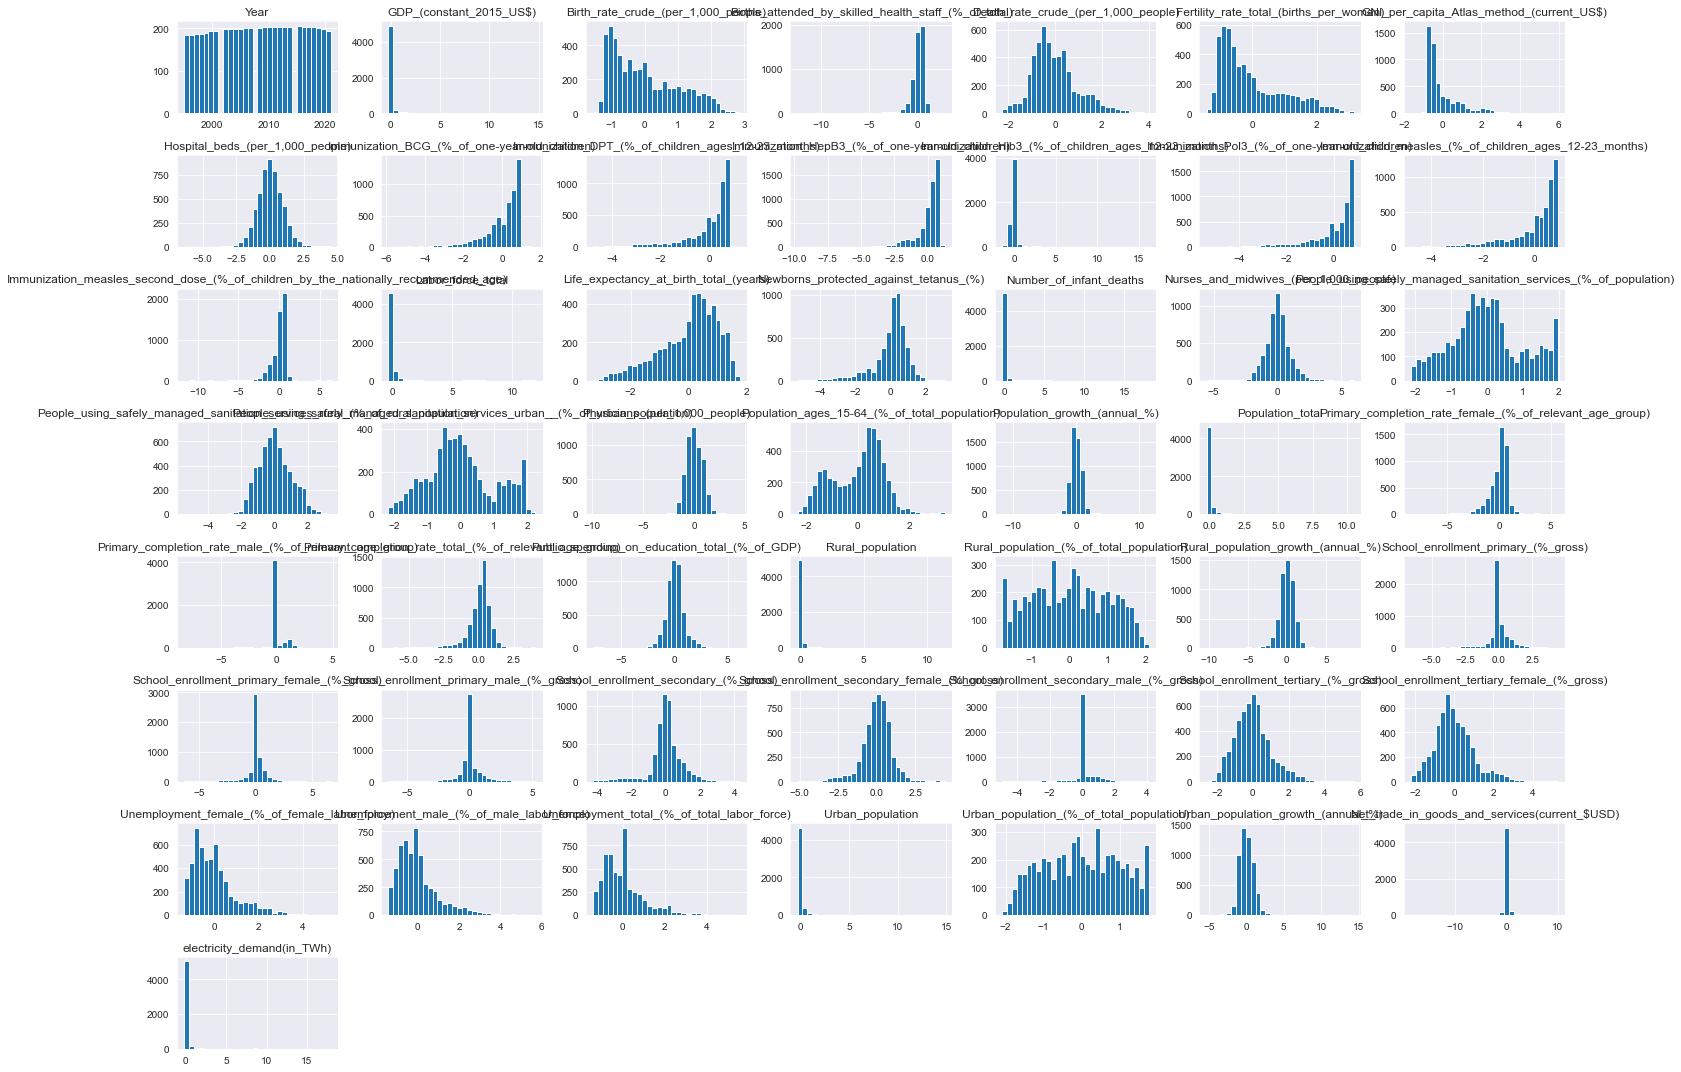

In [13]:
# Distribution Analysis
# Plot histograms for numeric features to understand their distributions
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [14]:
# Calculate skewness and kurtosis
skewness = df.skew()
kurtosis = df.kurt()

# Combine into a single DataFrame
distribution_stats = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
distribution_stats

C:\Users\Dell\AppData\Local\Temp\ipykernel_20316\1929031588.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()
C:\Users\Dell\AppData\Local\Temp\ipykernel_20316\1929031588.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = df.kurt()


,Skewness,Kurtosis
Year,-0.031190,-1.185085
GDP_(constant_2015_US$),9.757927,109.567044
"Birth_rate_crude_(per_1,000_people)",0.650527,-0.669206
Births_attended_by_skilled_health_staff_(%_of_total),-5.995919,55.459241
"Death_rate_crude_(per_1,000_people)",0.813642,0.834306
Fertility_rate_total_(births_per_woman),0.970578,-0.050435
GNI_per_capita_Atlas_method_(current_US$),2.136695,5.123397
"Hospital_beds_(per_1,000_people)",0.065180,2.336054
Immunization_BCG_(%_of_one-year-old_children),-1.906998,4.462289
Immunization_DPT_(%_of_children_ages_12-23_months),-1.909071,3.632716


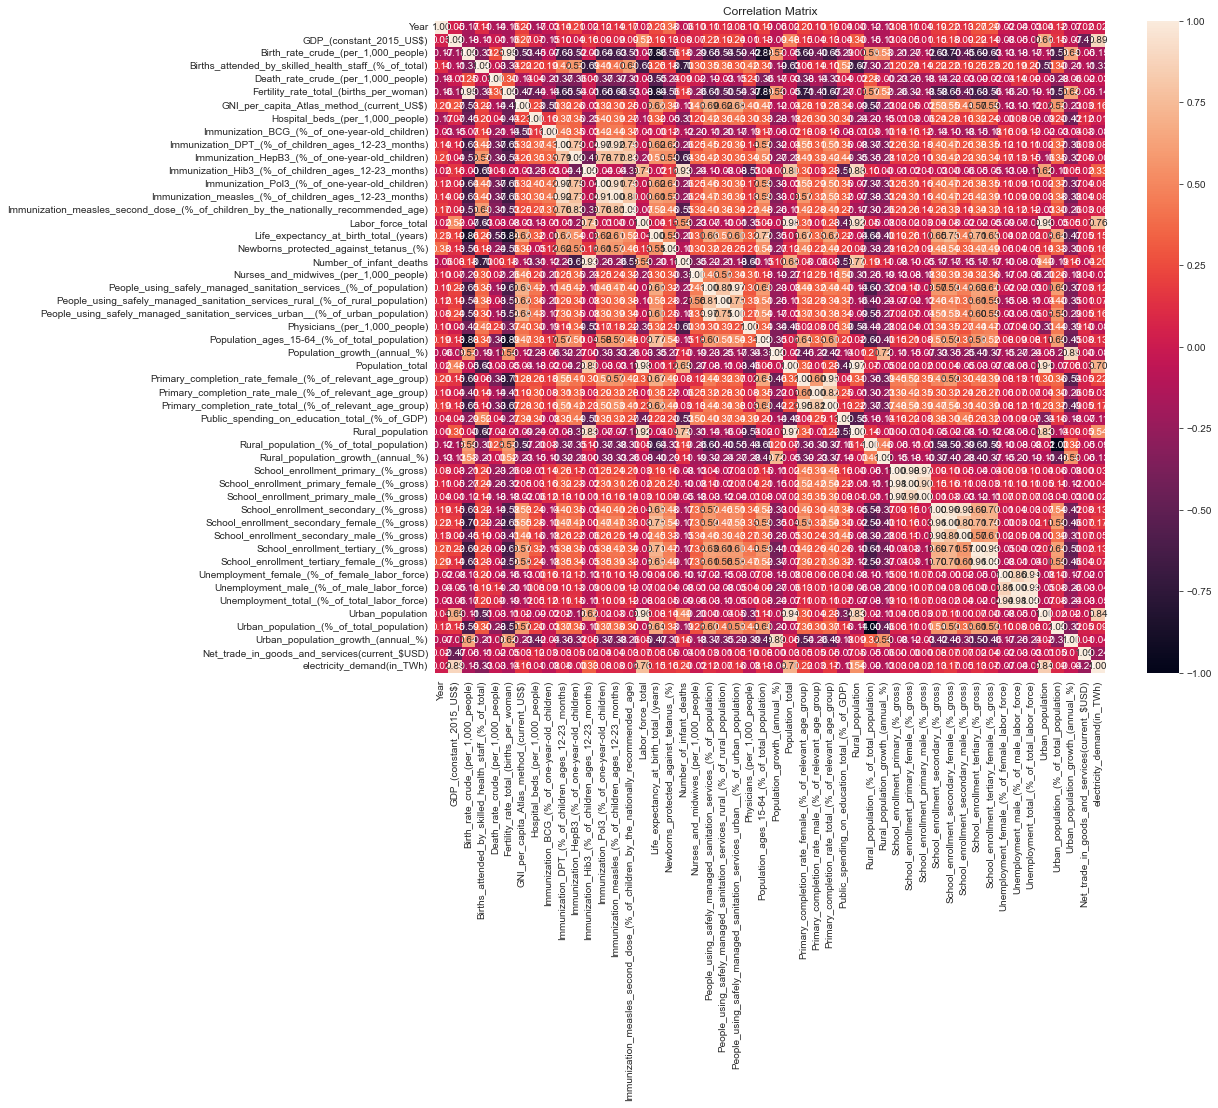

In [15]:
# Correlation Analysis
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.to_csv('cleaned_data_after_eda.csv', index=False)